In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


To ensure models are saved and trained on same tensorflow verisons installing tensorflow 2.15.0

In [ ]:
pip install tensorflow==2.15.0

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.15.0


# Import necessary libraries

In [25]:
import tensorflow as tf
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image


sys.path = list(set(sys.path))
print("Cleaned Python Path:", sys.path)

# Adding the 'models' directory to the Python path
sys.path.append('/content/drive/MyDrive/Product_Recognition_Categorisation/Models')
from all_class_labels import main_categories, fruits_classes, vegetables_classes, packages_classes

Cleaned Python Path: ['', '/usr/lib/python3/dist-packages', '/env/python', '/root/.ipython', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/usr/lib/python3.10', '/content/drive/MyDrive/Product_Recognition_Categorisation/Models', '/usr/lib/python3.10/lib-dynload', '/usr/lib/python310.zip', '/usr/local/lib/python3.10/dist-packages', '/content', '/usr/local/lib/python3.10/dist-packages/setuptools/_vendor']


Load main category and all sub-category models

In [ ]:
main_category_model = tf.keras.models.load_model(
    '/content/drive/MyDrive/Product_Recognition_Categorisation/Models/main_category_vgg16.h5',
    compile=False,
    custom_objects={'GlobalAveragePooling2D': GlobalAveragePooling2D}
)

fruits_subcategory_model = tf.keras.models.load_model(
    '/content/drive/MyDrive/Product_Recognition_Categorisation/Models/fruits_subcategory_vgg16.h5',
    compile=False,
    custom_objects={'GlobalAveragePooling2D': GlobalAveragePooling2D}
)
vegetables_subcategory_model = tf.keras.models.load_model(
    '/content/drive/MyDrive/Product_Recognition_Categorisation/Models/vegetables_subcategory_vgg16.h5',
    compile=False,
    custom_objects={'GlobalAveragePooling2D': GlobalAveragePooling2D}
)
packages_subcategory_model = tf.keras.models.load_model(
    '/content/drive/MyDrive/Product_Recognition_Categorisation/Models/packages_subcategory_vgg16.h5',
    compile=False,
    custom_objects={'GlobalAveragePooling2D': GlobalAveragePooling2D}
)

Function to predict the main category and then the subcategory

In [ ]:
def predict_image(image_path):
    image_size = (64, 64)

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=image_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Predict the main category
    main_category_prediction = main_category_model.predict(img_array)
    predicted_main_category_index = np.argmax(main_category_prediction[0])
    predicted_main_category = main_categories[predicted_main_category_index]

    # Load the subcategory model and labels
    if predicted_main_category == 'Fruits':
        subcategory_model = fruits_subcategory_model
        subcategory_labels = fruits_classes
    elif predicted_main_category == 'Vegetables':
        subcategory_model = vegetables_subcategory_model
        subcategory_labels = vegetables_classes
    else:  # Packages
        subcategory_model = packages_subcategory_model
        subcategory_labels = packages_classes

    # Predict the subcategory
    subcategory_prediction = subcategory_model.predict(img_array)
    predicted_subcategory_index = np.argmax(subcategory_prediction[0])
    predicted_subcategory = subcategory_labels[predicted_subcategory_index]

    return predicted_main_category, predicted_subcategory



Test with an sample image

In [ ]:
image_path = '/content/drive/MyDrive/Product_Recognition_Categorisation/Dataset/test/Fruits/grapes/Image_3.jpg'

predicted_main_category, predicted_subcategory = predict_image(image_path)

print(f'Predicted Main Category: {predicted_main_category}')
print(f'Predicted Subcategory: {predicted_subcategory}')

1/1 [==============================] - 0s 479ms/step
Predicted Main Category: Fruits
Predicted Subcategory: grapes


Load and display the image

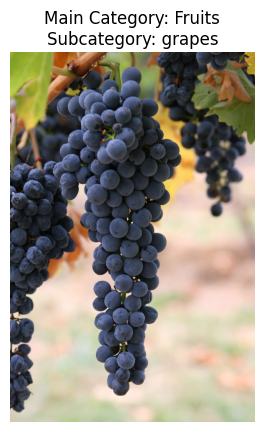

In [ ]:
img = mpimg.imread(image_path)
plt.imshow(img)
plt.title(f'Main Category: {predicted_main_category}\nSubcategory: {predicted_subcategory}')
plt.axis('off')
plt.show()

In [ ]:
image_path = '/content/drive/MyDrive/Product_Recognition_Categorisation/Dataset/test/Fruits/pear/Image_4.jpg'

predicted_main_category, predicted_subcategory = predict_image(image_path)

print(f'Predicted Main Category: {predicted_main_category}')
print(f'Predicted Subcategory: {predicted_subcategory}')

1/1 [==============================] - 0s 143ms/step
Predicted Main Category: Fruits
Predicted Subcategory: pear


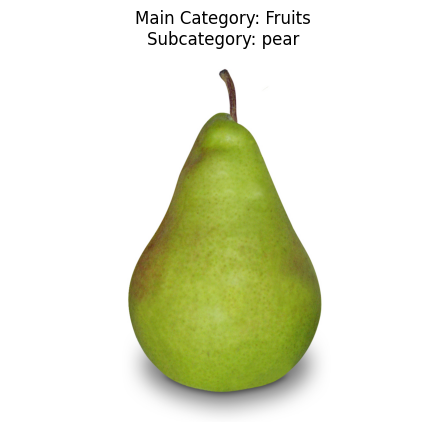

In [ ]:
img = mpimg.imread(image_path)
plt.imshow(img)
plt.title(f'Main Category: {predicted_main_category}\nSubcategory: {predicted_subcategory}')
plt.axis('off')
plt.show()

In [ ]:
image_path = '/content/drive/MyDrive/Product_Recognition_Categorisation/Dataset/test/Vegetables/cauliflower/Image_7.jpg'

predicted_main_category, predicted_subcategory = predict_image(image_path)

print(f'Predicted Main Category: {predicted_main_category}')
print(f'Predicted Subcategory: {predicted_subcategory}')

1/1 [==============================] - 2s 2s/step
Predicted Main Category: Vegetables
Predicted Subcategory: cauliflower


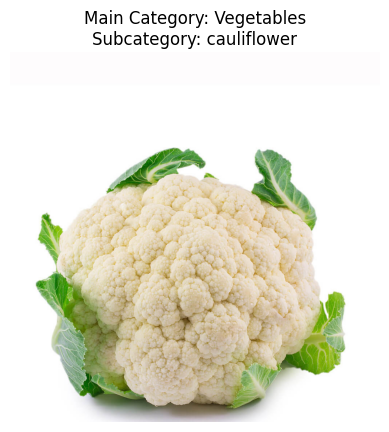

In [ ]:
img = mpimg.imread(image_path)
plt.imshow(img)
plt.title(f'Main Category: {predicted_main_category}\nSubcategory: {predicted_subcategory}')
plt.axis('off')
plt.show()

In [ ]:
image_path = '/content/drive/MyDrive/Product_Recognition_Categorisation/Dataset/test/Vegetables/soy beans/Image_9.jpg'

predicted_main_category, predicted_subcategory = predict_image(image_path)

print(f'Predicted Main Category: {predicted_main_category}')
print(f'Predicted Subcategory: {predicted_subcategory}')

1/1 [==============================] - 0s 139ms/step
Predicted Main Category: Vegetables
Predicted Subcategory: soy beans


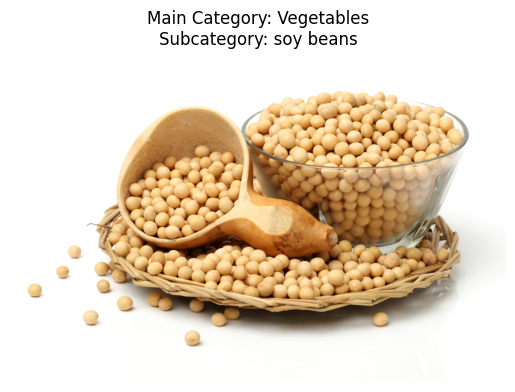

In [ ]:
img = mpimg.imread(image_path)
plt.imshow(img)
plt.title(f'Main Category: {predicted_main_category}\nSubcategory: {predicted_subcategory}')
plt.axis('off')
plt.show()

In [ ]:
image_path = '/content/drive/MyDrive/Product_Recognition_Categorisation/Dataset/test/Packages/Oatly-Natural-Oatghurt/Oatly-Natural-Oatghurt_002.jpg'

predicted_main_category, predicted_subcategory = predict_image(image_path)

print(f'Predicted Main Category: {predicted_main_category}')
print(f'Predicted Subcategory: {predicted_subcategory}')

1/1 [==============================] - 0s 479ms/step
Predicted Main Category: Packages
Predicted Subcategory: Oatly-Natural-Oatghurt


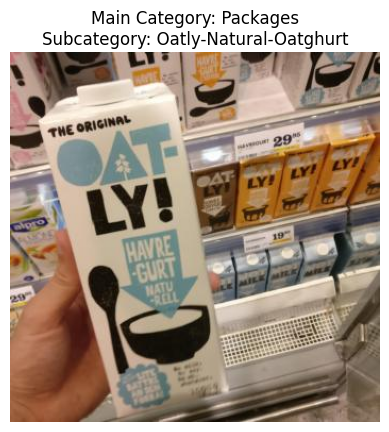

In [ ]:
img = mpimg.imread(image_path)
plt.imshow(img)
plt.title(f'Main Category: {predicted_main_category}\nSubcategory: {predicted_subcategory}')
plt.axis('off')
plt.show()

In [ ]:
image_path = '/content/drive/MyDrive/Product_Recognition_Categorisation/Dataset/test/Packages/Bravo-Apple-Juice/Bravo-Apple-Juice_006.jpg'

predicted_main_category, predicted_subcategory = predict_image(image_path)

print(f'Predicted Main Category: {predicted_main_category}')
print(f'Predicted Subcategory: {predicted_subcategory}')

1/1 [==============================] - 0s 160ms/step
Predicted Main Category: Packages
Predicted Subcategory: Bravo-Apple-Juice


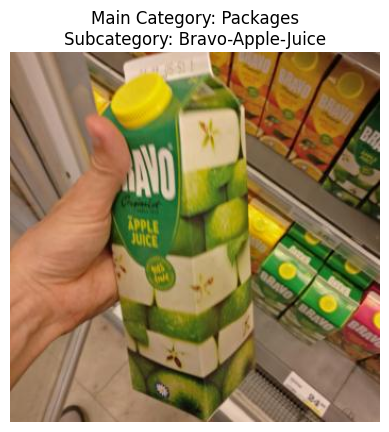

In [ ]:
img = mpimg.imread(image_path)
plt.imshow(img)
plt.title(f'Main Category: {predicted_main_category}\nSubcategory: {predicted_subcategory}')
plt.axis('off')
plt.show()

In [ ]:
image_path = '/content/drive/MyDrive/Product_Recognition_Categorisation/Dataset/test/Packages/Alpro-Blueberry-Soyghurt/Alpro-Blueberry-Soyghurt_012.jpg'

predicted_main_category, predicted_subcategory = predict_image(image_path)

print(f'Predicted Main Category: {predicted_main_category}')
print(f'Predicted Subcategory: {predicted_subcategory}')

1/1 [==============================] - 0s 135ms/step
Predicted Main Category: Packages
Predicted Subcategory: Alpro-Vanilla-Soyghurt


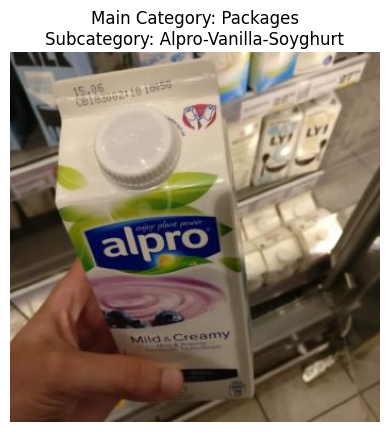

In [ ]:
img = mpimg.imread(image_path)
plt.imshow(img)
plt.title(f'Main Category: {predicted_main_category}\nSubcategory: {predicted_subcategory}')
plt.axis('off')
plt.show()

In [ ]:
image_size = (64, 64)
batch_size = 32

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Product_Recognition_Categorisation/Dataset/test',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important to keep the order of images for evaluation
)


Found 644 images belonging to 3 classes.


In [ ]:
model = main_category_model

In [ ]:
y_true = test_generator.classes
y_pred = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)

y_pred_classes = np.argmax(y_pred, axis=1)


21/21 [==============================] - 207s 10s/step


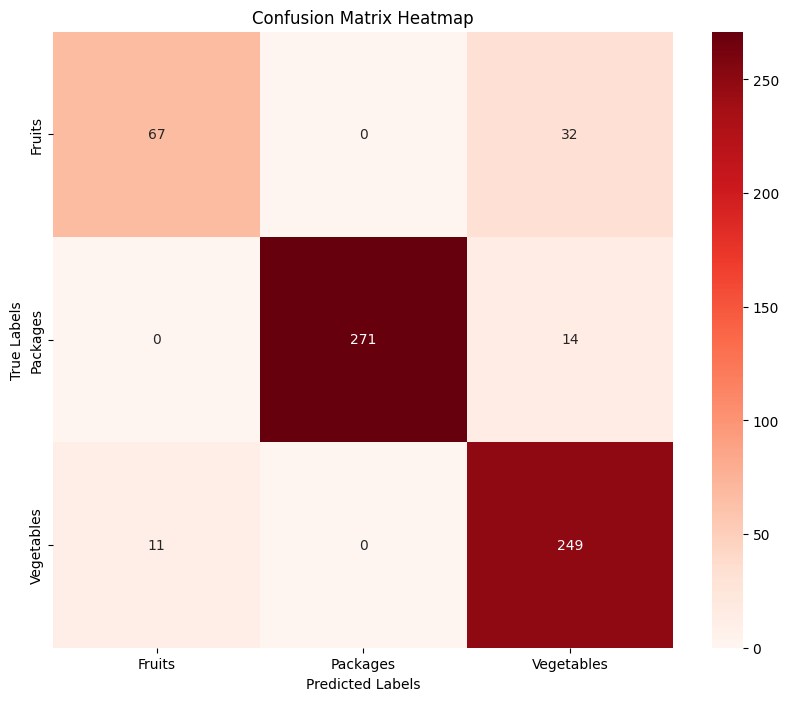


Classification Report:
               precision    recall  f1-score   support

      Fruits       0.86      0.68      0.76        99
    Packages       1.00      0.95      0.97       285
  Vegetables       0.84      0.96      0.90       260

    accuracy                           0.91       644
   macro avg       0.90      0.86      0.88       644
weighted avg       0.92      0.91      0.91       644



In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification Report
target_names = list(test_generator.class_indices.keys())
print("\nClassification Report:\n", classification_report(y_true, y_pred_classes, target_names=target_names))
